In [49]:
import pandas as pd
motor = pd.read_csv("C:/Users/chris/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv")
motor.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_11160\1194598399.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  motor = pd.read_csv("C:/Users/chris/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [51]:
#Want to include Contributing Factors by the vehicles, and number of people injured
print(motor.shape)

(2168832, 29)


In [53]:
#Creating subset

cols = ['NUMBER OF PERSONS INJURED', 'CONTRIBUTING FACTOR VEHICLE 1',
        'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3']
motor_factors = motor[cols].copy()

motor_factors.head()

,NUMBER OF PERSONS INJURED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3
0,2.0,Aggressive Driving/Road Rage,Unspecified,NaN
1,1.0,Pavement Slippery,NaN,NaN
2,1.0,Unspecified,Unspecified,Unspecified
3,0.0,Following Too Closely,Unspecified,NaN
4,0.0,Passing Too Closely,Unspecified,NaN


C:\Users\chris\AppData\Local\Temp\ipykernel_11160\968098037.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


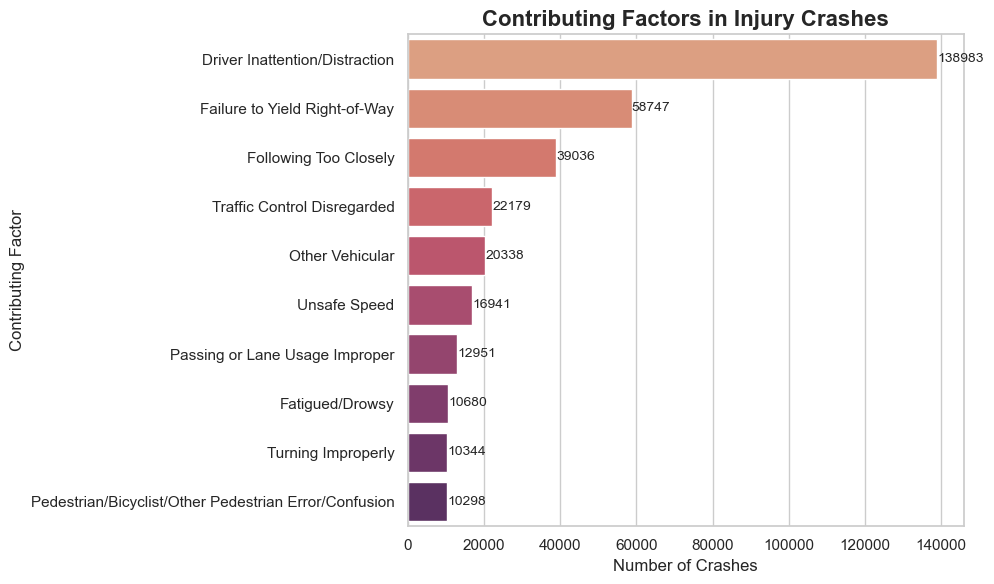

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

motor_injured = motor_factors[motor_factors['NUMBER OF PERSONS INJURED'] > 0]

factors = pd.concat([
    motor_injured['CONTRIBUTING FACTOR VEHICLE 1'],
    motor_injured['CONTRIBUTING FACTOR VEHICLE 2'],
    motor_injured['CONTRIBUTING FACTOR VEHICLE 3']
], ignore_index=True)

factors = factors.dropna()
factors = factors[factors != 'Unspecified']

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_factors.values,
    y=top_factors.index,
    palette="flare"
)

plt.title("Contributing Factors in Injury Crashes", fontsize=16, weight='bold')
plt.xlabel("Number of Crashes", fontsize=12)
plt.ylabel("Contributing Factor", fontsize=12)

# Add value labels to bars
for index, value in enumerate(top_factors.values):
    plt.text(value + 100, index, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()